In [1]:
import mne
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib.lines import Line2D
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import statsmodels.api as sm
import statsmodels.formula.api as smf

%run /home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Scripts/Preprocessing/constants.py
%run /home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Scripts/Analyse/Human/powerplots.py
%run /home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Scripts/Human/preprocess_human.py

In [4]:
test = pd.read_csv('/home/melissa/RESULTS/FINAL_MODEL/Human/Power/P1 N1_power_all_frequency_bands.csv')

In [7]:
all_dfs_ls = []
for idx in clean_ids:
    df = pd.read_csv(idx + '_power_all_frequency_bands.csv')
    if idx in nt_genotype_human:
        geno = 'NT'
    if idx in gap_genotype_human:
        geno = 'GAP'
    genotype_column = [geno]*len(df)
    df['Genotype'] = genotype_column
    all_dfs_ls.append(df)

In [8]:
all_dfs = pd.concat(all_dfs_ls)
all_dfs.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [8]:
human_data_folder = '/home/melissa/PREPROCESSING/SYNGAP1/SYNGAP1_Human_Data'
results_path = '/home/melissa/RESULTS/XGBoost/Human_SYNGAP1/Theta_Power/'
noise_directory = '/home/melissa/PREPROCESSING/SYNGAP1/human_npy/harmonic_idx/'

all_patient_ls = []

In [9]:
all_gap_ls = []
for idx in gap_genotype:
    file_name = '/home/melissa/PREPROCESSING/SYNGAP1/SYNGAP_Human_Data_Clean/' + str(idx) +  '.edf'
    noise_file = np.load('/home/melissa/PREPROCESSING/SYNGAP1/human_npy/noise_idx/' + idx + '_noise.npy')
    raw = mne.io.read_raw_edf(file_name, preload=True)
    data, times = raw[:]  
    num_epochs, epochs = split_into_epochs(data = data, sampling_rate = 256, num_seconds = 30)

Extracting EDF parameters from /home/melissa/PREPROCESSING/SYNGAP1/SYNGAP_Human_Data_Clean/P10 N1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1704959  =      0.000 ...  6659.996 secs...
Extracting EDF parameters from /home/melissa/PREPROCESSING/SYNGAP1/SYNGAP_Human_Data_Clean/P15 N1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 69119  =      0.000 ...   269.996 secs...
Extracting EDF parameters from /home/melissa/PREPROCESSING/SYNGAP1/SYNGAP_Human_Data_Clean/P16 N1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1359359  =      0.000 ...  5309.996 secs...
Extracting EDF parameters from /home/melissa/PREPROCESSING/SYNGAP1/SYNGAP_Human_Data_Clean/P20 N1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 959999  =      0.000 ...  3749.996 secs...
Extracting EDF para

In [23]:
all_gap_ls = []
for patient in gap_genotype_human:
    print(patient)
    file_name = '/home/melissa/PREPROCESSING/SYNGAP1/SYNGAP_Human_Data_Clean/' + str(patient) +  '.edf'
    noise_file = list(np.load('/home/melissa/PREPROCESSING/SYNGAP1/human_npy/noise_idx/' + patient + '_noise.npy'))
    raw = mne.io.read_raw_edf(file_name, preload=True)
    data, times = raw[:]  
    num_epochs, epochs = split_into_epochs(data = data, sampling_rate = 256, num_seconds = 30)
    # Select the data and channel type for power analysis, e.g., EEG
    #raw.pick_types(eeg=True)

    # Compute the power using Welch's method
    print(num_epochs)
    for idx, epoch in enumerate(epochs):
        #if idx in noise_file:
        #    print(idx)
        #    pass
        #else:
        power, freqs = mne.time_frequency.psd_array_welch(epoch, fmin=1, fmax=48, sfreq=256)
        channel_ls = []
        for chan, pwer_dict in enumerate(power):
            print(chan)
            chan_dict = {'Patient_ID': [patient]*len(freqs), 'Genotype': ['GAP']*len(freqs), 'Frequency': freqs,
                     'Power': pwer_dict, 'Channel': [chan]*len(freqs)}
            chan_df = pd.DataFrame(data=chan_dict)
            channel_ls.append(chan_df)
        
        patient_df = pd.concat(channel_ls)
        all_gap_ls.append(patient_df)

P15 N1
Extracting EDF parameters from /home/melissa/PREPROCESSING/SYNGAP1/SYNGAP_Human_Data_Clean/P15 N1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 69119  =      0.000 ...   269.996 secs...
9
Effective window size : 1.000 (s)
0
1
2
3
4
5
Effective window size : 1.000 (s)
0
1
2
3
4
5
Effective window size : 1.000 (s)
0
1
2
3
4
5
Effective window size : 1.000 (s)
0
1
2
3
4
5
Effective window size : 1.000 (s)
0
1
2
3
4
5
Effective window size : 1.000 (s)
0
1
2
3
4
5
Effective window size : 1.000 (s)
0
1
2
3
4
5
Effective window size : 1.000 (s)
0
1
2
3
4
5
Effective window size : 1.000 (s)
0
1
2
3
4
5
P23 N1
Extracting EDF parameters from /home/melissa/PREPROCESSING/SYNGAP1/SYNGAP_Human_Data_Clean/P23 N1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 161279  =      0.000 ...   629.996 secs...
21
Effective window size : 1.000 (s)
0
1
2
3
4
5
Effective window size : 1.000 (s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

In [29]:
all_wt_ls = []
for patient in nt_genotype_human:
    file_name = '/home/melissa/PREPROCESSING/SYNGAP1/SYNGAP_Human_Data_Clean/' + str(patient) +  '.edf'
    noise_file = list(np.load('/home/melissa/PREPROCESSING/SYNGAP1/human_npy/noise_idx/' + patient + '_noise.npy'))
    raw = mne.io.read_raw_edf(file_name, preload=True)
    data, times = raw[:]  
    num_epochs, epochs = split_into_epochs(data = data, sampling_rate = 256, num_seconds = 30)
    # Select the data and channel type for power analysis, e.g., EEG
    #raw.pick_types(eeg=True)

    # Compute the power using Welch's method
    for idx, epoch in enumerate(epochs):
        if idx in noise_file:
            pass
        else:
            power, freqs = mne.time_frequency.psd_array_welch(epoch, fmin=1, fmax=48, sfreq=256)
            channel_ls = []
            for chan, pwer_dict in enumerate(power):
                print(chan)
                chan_dict = {'Patient_ID': [patient]*len(freqs), 'Genotype': ['WT']*len(freqs), 'Frequency': freqs,
                     'Power': pwer_dict, 'Channel': [chan]*len(freqs)}
                chan_df = pd.DataFrame(data=chan_dict)
                channel_ls.append(chan_df)
        
            patient_df = pd.concat(channel_ls)
            all_wt_ls.append(patient_df)

Extracting EDF parameters from /home/melissa/PREPROCESSING/SYNGAP1/SYNGAP_Human_Data_Clean/P29 N2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 499199  =      0.000 ...  1949.996 secs...
Effective window size : 1.000 (s)
0
1
2
3
4
5
Effective window size : 1.000 (s)
0
1
2
3
4
5
Effective window size : 1.000 (s)
0
1
2
3
4
5
Effective window size : 1.000 (s)
0
1
2
3
4
5
Effective window size : 1.000 (s)
0
1
2
3
4
5
Effective window size : 1.000 (s)
0
1
2
3
4
5
Effective window size : 1.000 (s)
0
1
2
3
4
5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

In [30]:
all_gap_cv = pd.concat(all_gap_ls)
all_wt_cv = pd.concat(all_wt_ls)

In [34]:
gap_unique = np.unique(all_gap_cv['Patient_ID'])
wt_unique = np.unique(all_wt_cv['Patient_ID'])

In [28]:
channel_colors = ['orangered', 'teal', 'skyblue', 'darkblue', 'plum']
hue_order = [0, 1, 2, 3, 4,5]
for patient in gap_unique:
    fig, axs = plt.subplots(1, 1, figsize=(8, 5), sharex=True, sharey=True)
    #hue_order = ['WT', 'GAP']
    #genotype_colour = ['darkblue', 'orangered']
    unique_patient = all_gap_cv.loc[all_gap_cv['Patient_ID'] == patient]
    sns.lineplot(data=unique_patient, x='Frequency', y='Power', hue='Channel', linewidth=2, palette = channel_colors, hue_order = hue_order)
    sns.despine()
    axs.set_yscale('log')
    axs.set_xlim(1, 35)
    axs.set_ylim(10**-12, 10**-7)
    axs.set_title(str(patient) + ' GAP')
    plt.savefig('/home/melissa/RESULTS/SYNGAP1/Thesis/Human/power_supp_figures/' + str(patient) + '_all_channels.png')
    plt.savefig('/home/melissa/RESULTS/SYNGAP1/Thesis/Human/power_supp_figures/' + str(patient) + '_all_channels.svg')
    plt.clf()

/tmp/ipykernel_342483/3382329835.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=unique_patient, x='Frequency', y='Power', hue='Channel', linewidth=2, palette = channel_colors, hue_order = hue_order)
/tmp/ipykernel_342483/3382329835.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=unique_patient, x='Frequency', y='Power', hue='Channel', linewidth=2, palette = channel_colors, hue_order = hue_order)


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [37]:
channel_colors = ['orangered', 'teal', 'skyblue', 'darkblue', 'plum']
hue_order = [0, 1, 2, 3, 4,5]
for patient in wt_unique:
    fig, axs = plt.subplots(1, 1, figsize=(8, 5), sharex=True, sharey=True)
    #hue_order = ['WT', 'GAP']
    #genotype_colour = ['darkblue', 'orangered']
    unique_patient = all_wt_cv.loc[all_wt_cv['Patient_ID'] == patient]
    sns.lineplot(data=unique_patient, x='Frequency', y='Power', hue='Channel', linewidth=2, palette = channel_colors, hue_order = hue_order)
    sns.despine()
    axs.set_yscale('log')
    axs.set_xlim(1, 35)
    axs.set_ylim(10**-12, 10**-7)
    axs.set_title(str(patient) + ' WT')
    plt.savefig('/home/melissa/RESULTS/SYNGAP1/Thesis/Human/power_supp_figures/' + str(patient) + '_all_channels_wt.png')
    plt.savefig('/home/melissa/RESULTS/SYNGAP1/Thesis/Human/power_supp_figures/' + str(patient) + '_all_channels_wt.svg')
    plt.clf()

/tmp/ipykernel_342483/1450587989.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=unique_patient, x='Frequency', y='Power', hue='Channel', linewidth=2, palette = channel_colors, hue_order = hue_order)


<Figure size 800x500 with 0 Axes>

In [13]:
all_patients = pd.concat([all_gap_cv, all_wt_cv])
all_patients

,Patient_ID,Genotype,Frequency,Power,Channel
0,P10 N1,GAP,1.0,9.341679e-09,0
1,P10 N1,GAP,2.0,2.389546e-09,0
2,P10 N1,GAP,3.0,9.902343e-10,0
3,P10 N1,GAP,4.0,6.042070e-10,0
4,P10 N1,GAP,5.0,2.590138e-10,0
...,...,...,...,...,...
43,P28 N1,WT,44.0,1.938960e-14,5
44,P28 N1,WT,45.0,1.863895e-14,5
45,P28 N1,WT,46.0,1.791858e-14,5
46,P28 N1,WT,47.0,1.716873e-14,5


(1.0, 35.0)

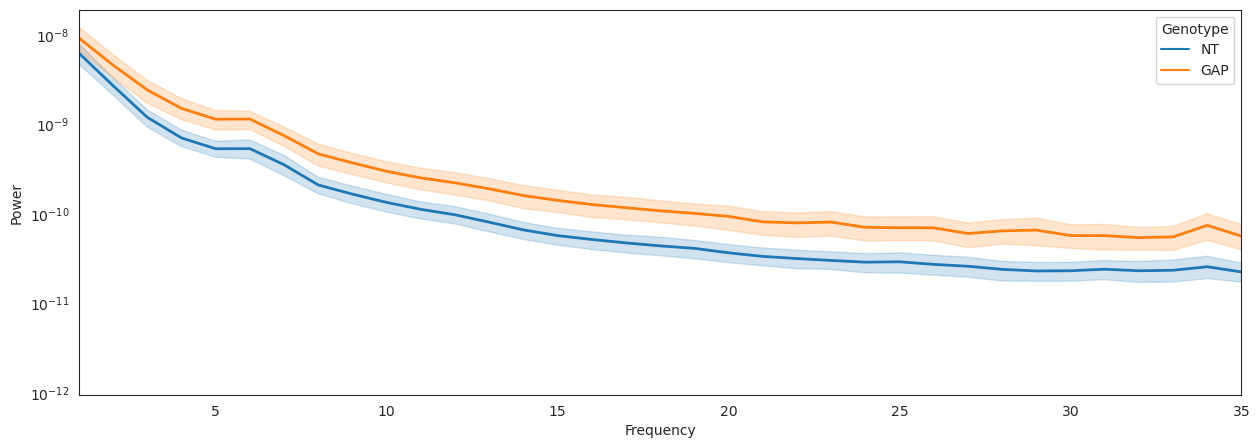

In [114]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5), sharex=True, sharey=True)
sns.lineplot(data=all_patients, x='Frequency', y='Power', hue='Genotype', linewidth=2)
axs.set_yscale('log')
axs.set_xlim(1, 35)
#axs.set_ylim(10**-2, 10**2)

In [14]:
chan_dict = {}
for i in range(6):  # Assuming channels 0 through 5
    chan_dict[f'chan_{i}'] = all_patients.loc[all_patients['Channel'] == i]

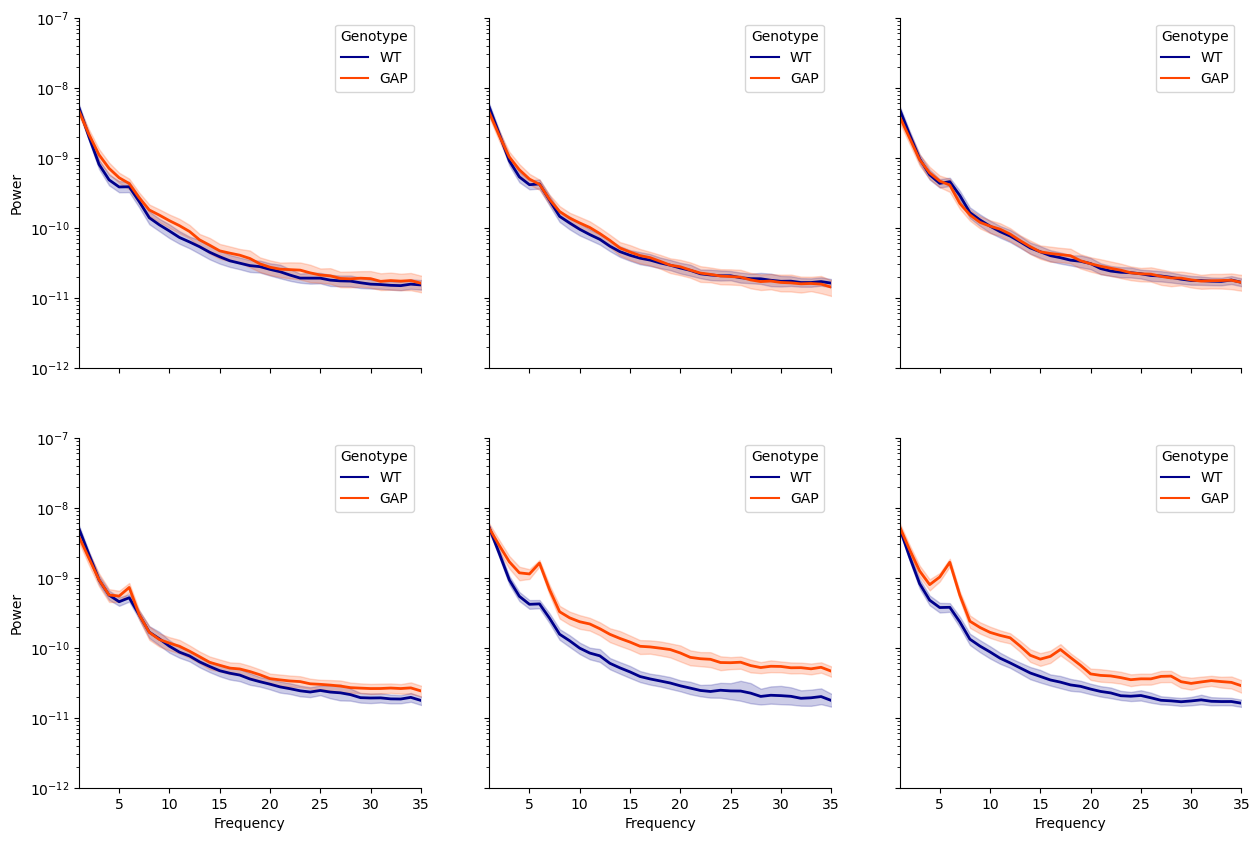

In [44]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
hue_order = ['WT', 'GAP']
genotype_colour = ['darkblue', 'orangered']

# Use enumerate to get both the index and the channel key from chan_dict
for index, (chan_key, chan_data) in enumerate(chan_dict.items()):
    i, j = divmod(index, 3)
    sns.lineplot(data=chan_data, x='Frequency', y='Power', hue='Genotype', linewidth=2, ax=axs[i, j], hue_order=hue_order, palette=genotype_colour)
    axs[i, j].set_yscale('log')
    axs[i, j].set_xlim(1, 35)
    axs[i, j].set_ylim(10**-12, 10**-7)

sns.despine()

plt.savefig('/home/melissa/RESULTS/SYNGAP1/Thesis/Human/all_channels_clean_epochs_genotype.svg')

In [65]:
delta = chan_5.loc[(chan_5['Frequency'] >= 1) & (chan_5['Frequency'] < 4)] 
alpha = chan_5.loc[(chan_5['Frequency'] >= 8) & (chan_5['Frequency'] < 13)] 
beta = chan_5.loc[(chan_5['Frequency'] >= 13) & (chan_5['Frequency'] < 30)] 
gamma = chan_5.loc[(chan_5['Frequency'] >= 30) & (chan_5['Frequency'] < 35)] 

In [66]:
# Assuming nt_genotype_human and gap_genotype_human are defined somewhere above
frequencies = ['Delta', 'Alpha', 'Beta', 'Gamma']
data_frames = [delta, alpha, beta, gamma]  # Assuming these are defined with the corresponding data

# Initialize an empty list to store all concatenated DataFrames
all_concat = []

for freq, data_frame in zip(frequencies, data_frames):
    concat_wt = process_data_for_genotype_frequency(data_frame, nt_genotype_human, 'WT', freq)
    concat_gap = process_data_for_genotype_frequency(data_frame, gap_genotype_human, 'GAP', freq)
    
    # Concatenate the WT and GAP results for the current frequency and add to the list
    all_concat.append(pd.concat([concat_wt, concat_gap]))

# Finally, concatenate all results into a single DataFrame
all_freqs = pd.concat(all_concat)


In [68]:
all_freqs.dropna(inplace = True)
all_freqs.to_csv('/home/melissa/RESULTS/SYNGAP1/Thesis/Human/' + 'chan_5_all_frequencies.csv')

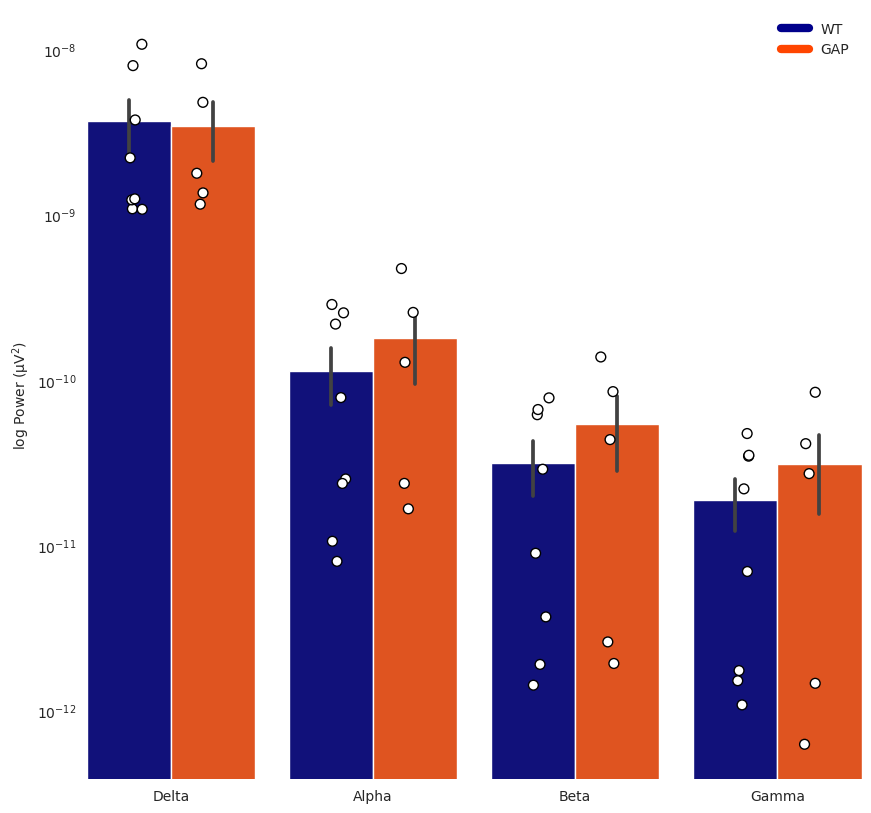

In [69]:
chan_5 = bar_and_strip_plots(delta_concat, alpha_concat, beta_concat, gamma_concat)
plt.savefig('/home/melissa/RESULTS/SYNGAP1/Thesis/Human/' + 'chan_5_bar_plots.svg')
plt.savefig('/home/melissa/RESULTS/SYNGAP1/Thesis/Human/' + 'chan_5_bar_plots.png')

In [130]:
for patient in gap_genotype:
    print(patient)
    print('delta')
    file_name = patient + '_(1).edf'
    filtered_data = load_filtered_data(file_path = human_data_folder, file_name = file_name)
    number_epochs, epochs = split_into_epochs(filtered_data, sampling_rate = 256, num_seconds = 30)
    clean_indices = select_clean_indices(noise_directory = noise_directory, patient_id = patient, total_num_epochs = number_epochs)
    
    patient_ls = []
    channels_idx = list(np.arange(0, 6))
    for chan in channels_idx:
        power_ls = []
        for clean_idx in clean_indices:
            power_calculations = scipy.signal.welch(epochs[clean_idx][chan], window = 'hann', fs = 256, nperseg = 7680)
            geno = 'GAP'
            power_calculations_dict = {'Patient_ID': [patient]*len(power_calculations[1]),
                                       'Genotype': [geno]*len(power_calculations[1]),
                                       'Channel': [chan]*len(power_calculations[1]),
                                       'Frequency': power_calculations[0],
                                       'Power': power_calculations[1]}
            power_calculations_df = pd.DataFrame(data = power_calculations_dict)
            power_ls.append(power_calculations_df)
        channel_concat = pd.concat(power_ls)
        average_power = channel_concat.groupby('Frequency')['Power'].mean().reset_index()
        power_calculations_dict = {'Patient_ID': [patient]*len(average_power),
                                       'Genotype': [geno]*len(average_power),
                                       'Channel': [chan]*len(average_power),
                                       'Frequency': average_power['Frequency'],
                                       'Power': average_power['Power']}
        power_calculations_df = pd.DataFrame(data = power_calculations_dict)
        print(power_calculations_df)
    patient_ls.append(power_calculations_df)
    patient_concat = pd.concat(patient_ls)
    all_patient_ls.append(patient_concat)
    patient_concat.to_csv('/home/melissa/RESULTS/SYNGAP1/Human/Power/' + str(patient) + '_power.csv')

P10 N1
delta
Extracting EDF parameters from /home/melissa/PREPROCESSING/SYNGAP1/SYNGAP1_Human_Data/P10 N1_(1).edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12901887  =      0.000 ... 50397.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 2817 samples (11.004 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.6s finished


     Patient_ID Genotype  Channel   Frequency         Power
0        P10 N1      GAP        0    0.000000  3.529009e-10
1        P10 N1      GAP        0    0.033333  4.830886e-10
2        P10 N1      GAP        0    0.066667  2.270039e-09
3        P10 N1      GAP        0    0.100000  8.858751e-09
4        P10 N1      GAP        0    0.133333  2.370268e-08
...         ...      ...      ...         ...           ...
3836     P10 N1      GAP        0  127.866667  1.706815e-19
3837     P10 N1      GAP        0  127.900000  1.203911e-19
3838     P10 N1      GAP        0  127.933333  1.600084e-19
3839     P10 N1      GAP        0  127.966667  2.498198e-19
3840     P10 N1      GAP        0  128.000000  1.471000e-19

[3841 rows x 5 columns]


KeyboardInterrupt: 

In [66]:
all_patients_concat = pd.concat(all_patient_ls)
all_patients_concat

,Patient_ID,Genotype,Channel,Frequency,Power
0,P1 N1,NT,5,0.000000,5.498547e+01
1,P1 N1,NT,5,0.033333,2.219950e+01
2,P1 N1,NT,5,0.066667,2.681730e+02
3,P1 N1,NT,5,0.100000,2.250621e+03
4,P1 N1,NT,5,0.133333,4.599957e+03
...,...,...,...,...,...
3836,P30 N1,GAP,5,127.866667,1.764856e-14
3837,P30 N1,GAP,5,127.900000,1.773900e-14
3838,P30 N1,GAP,5,127.933333,1.074365e-14
3839,P30 N1,GAP,5,127.966667,8.383905e-15
